In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ds_dataset.csv')
data.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
First Name                                                   10000 non-null object
Last Name                                                    10000 non-null object
City                                                         10000 non-null object
State                                                        10000 non-null object
Zip Code                                                     10000 non-null int64
DOB [DD/MM/YYYY]                                             10000 non-null object
Age                                                          10000 non-null int64
Gender                                                       10000 non-null object
Email Address                                                10000 non-null object
Contact Number                                               10000 non-null int64
Emergency Contact Number                                     1000

In [4]:
data.drop(['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)', 'link to Linkedin profile','State','DOB [DD/MM/YYYY]', 'Email Address','Contact Number', 'Emergency Contact Number','Zip Code','Gender'],axis=1,inplace=True)

In [5]:
pdf = PdfPages('Visualizations.pdf')

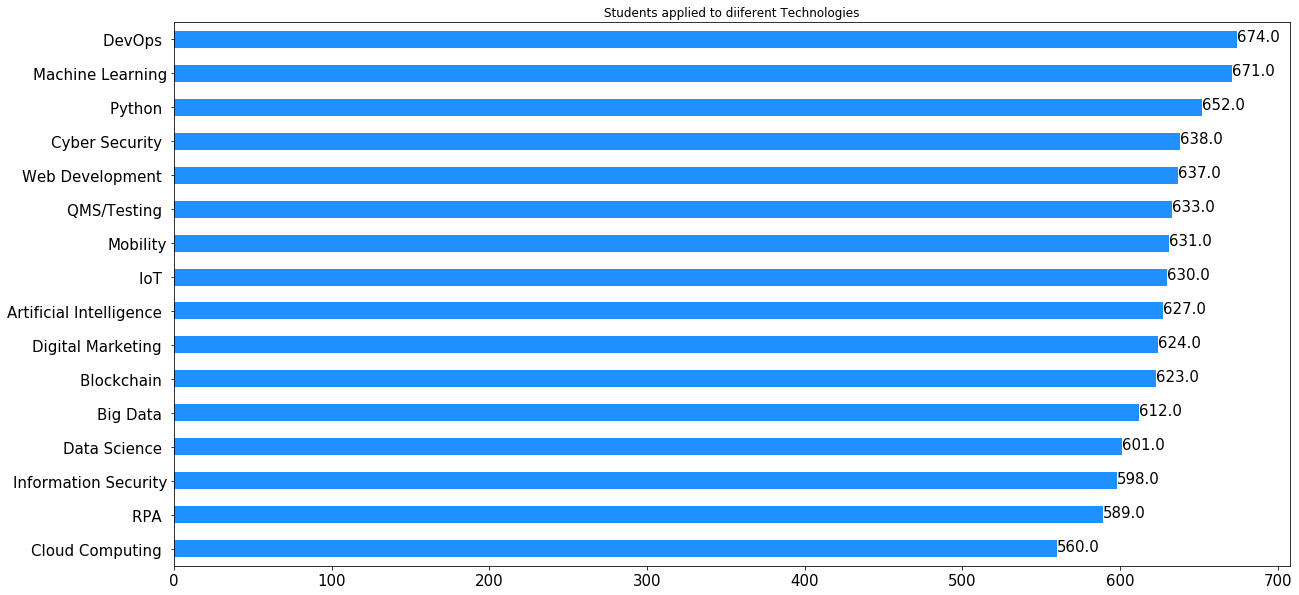

In [6]:
#2(a)
ax = data['Areas of interest'].value_counts().plot(kind='barh',stacked=True,figsize=(20,10),color='dodgerblue',fontsize=15,title="Students applied to diiferent Technologies")
totals =[]
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax.invert_yaxis()
pdf.savefig()

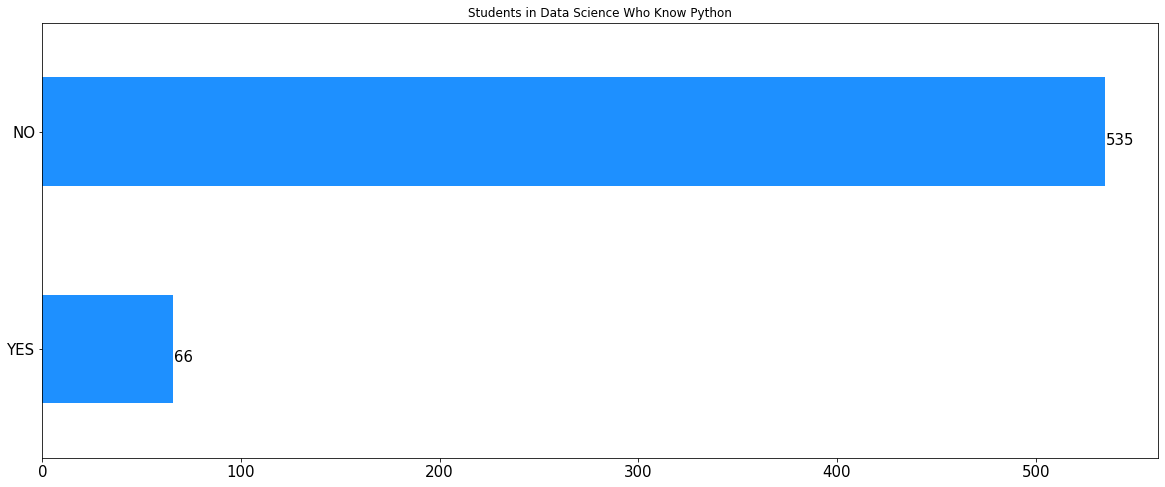

In [7]:
#2(b)
DS = data[['Areas of interest','Programming Language Known other than Java (one major)']]
DSP = DS.groupby(['Areas of interest'])
Langs = DSP.get_group('Data Science ')
lang1 = list(Langs['Programming Language Known other than Java (one major)'])
x=lang1
list1=[]
for i in range(0,len(lang1)):
    if (x[i]=="Python"):
        list1.append("YES")
    else:
        list1.append("NO")
lang2 = pd.DataFrame({"Python":list1})
ax0 = lang2['Python'].value_counts().plot(kind='barh',figsize=(20,8),color='dodgerblue',fontsize=15,title="Students in Data Science Who Know Python")
totals =[]
for i in ax0.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax0.patches:
    ax0.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax0.invert_yaxis()
pdf.savefig()

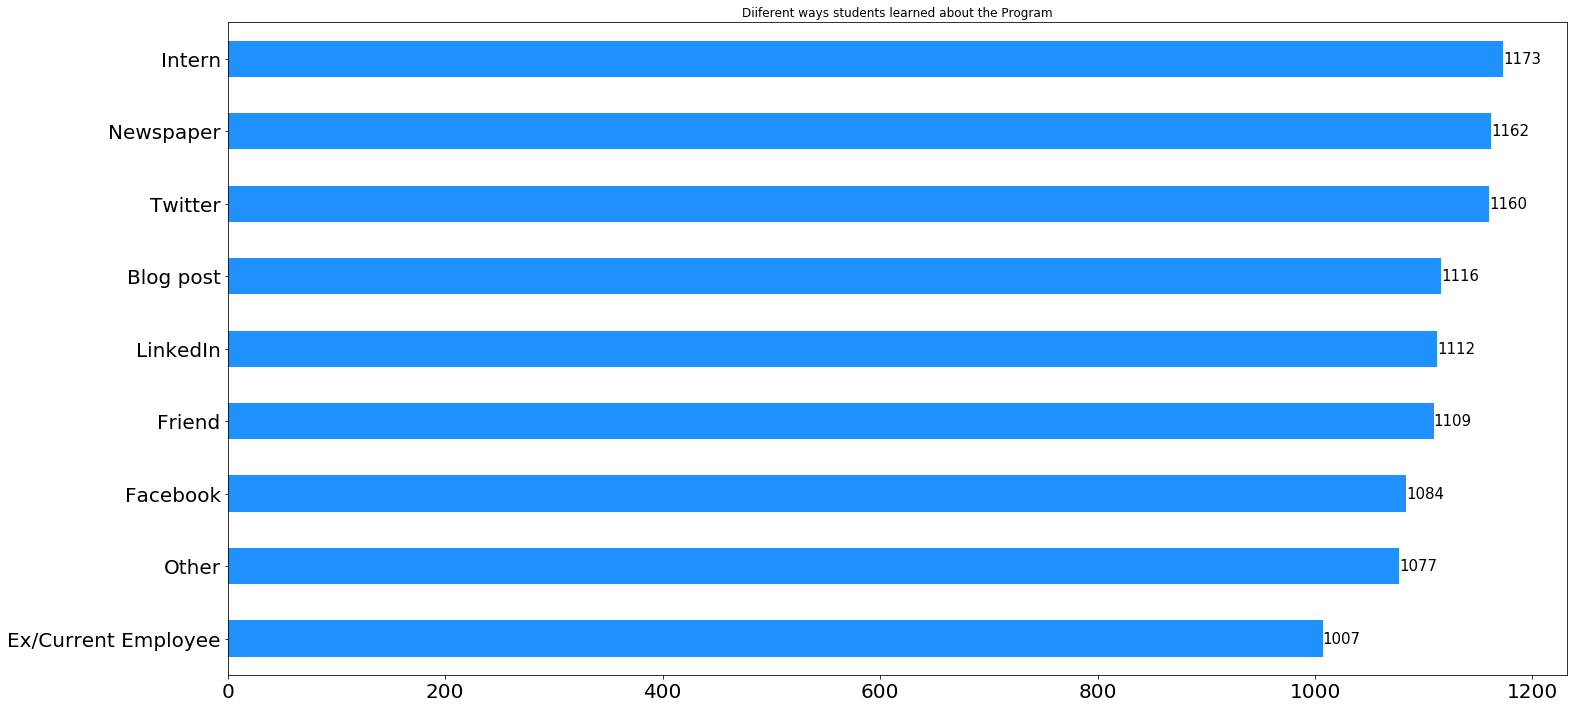

In [8]:
#2(c)
ax1 = data['How Did You Hear About This Internship?'].value_counts().plot(kind='barh',figsize=(24,12),color='dodgerblue',fontsize=20,title="Diiferent ways students learned about the Program")
totals =[]
for i in ax1.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax1.patches:
    ax1.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax1.invert_yaxis()
pdf.savefig()

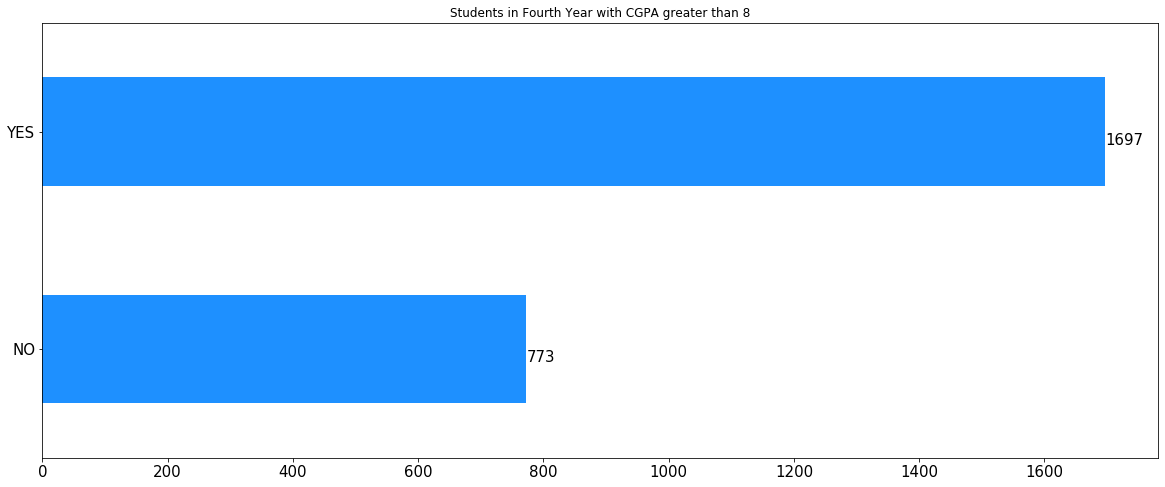

In [9]:
#2(d)
CG = data[['Which-year are you studying in?','CGPA/ percentage']]
CGP = CG.groupby(['Which-year are you studying in?'])
studs = CGP.get_group('Fourth-year')
studs_0 = list(studs['CGPA/ percentage'])
x=studs_0
list1=[]
for i in range(0,len(studs_0)):
    if x[i]>8.0:
        list1.append("YES")
    elif x[i]<8.0:
        list1.append("NO")
students = pd.DataFrame({"Fourth Year":list1})
ax2 = students['Fourth Year'].value_counts().plot(kind="barh",figsize=(20,8),color='dodgerblue',fontsize=15,title="Students in Fourth Year with CGPA greater than 8")
totals =[]
for i in ax2.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax2.patches:
    ax2.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax2.invert_yaxis()
pdf.savefig()

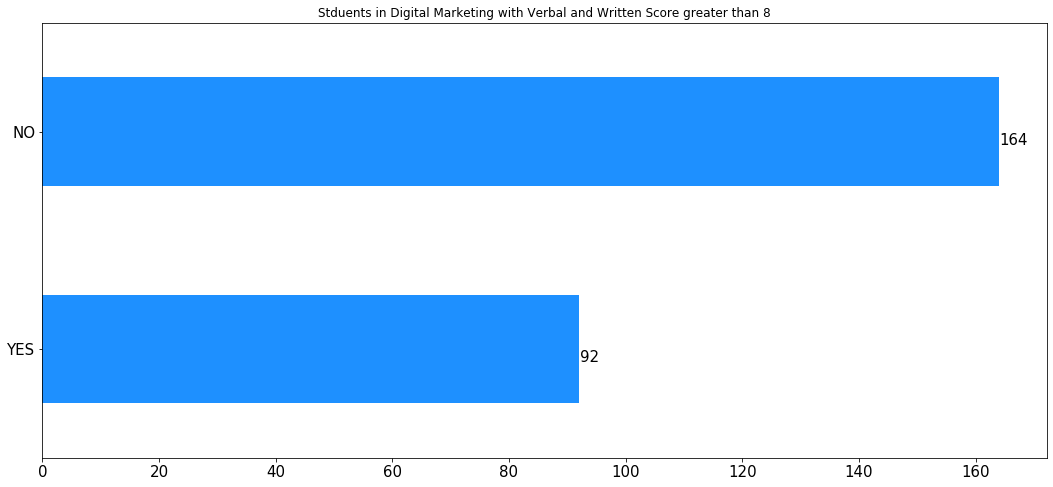

In [10]:
#2(e)
DM = data[['Areas of interest','Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]']]
DMS = DM.groupby(['Areas of interest'])
DM0 = DMS.get_group('Digital Marketing ')
DM1 = list(DM0['Rate your written communication skills [1-10]'])
DM2 = list(DM0['Rate your verbal communication skills [1-10]'])
x=DM1
y=DM2
list1=[]
for i in range(0,624):
        if x[i]>8.0:
            if y[i]>8.0:
                list1.append("YES")
            else:
                list1.append("NO")
Dig = pd.DataFrame({"Digital Marketing":list1})
ax3 = Dig['Digital Marketing'].value_counts().plot(kind="barh",figsize=(18,8),color='dodgerblue',fontsize=15,title="Stduents in Digital Marketing with Verbal and Written Score greater than 8")
totals =[]
for i in ax3.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax3.patches:
    ax3.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax3.invert_yaxis()
pdf.savefig()

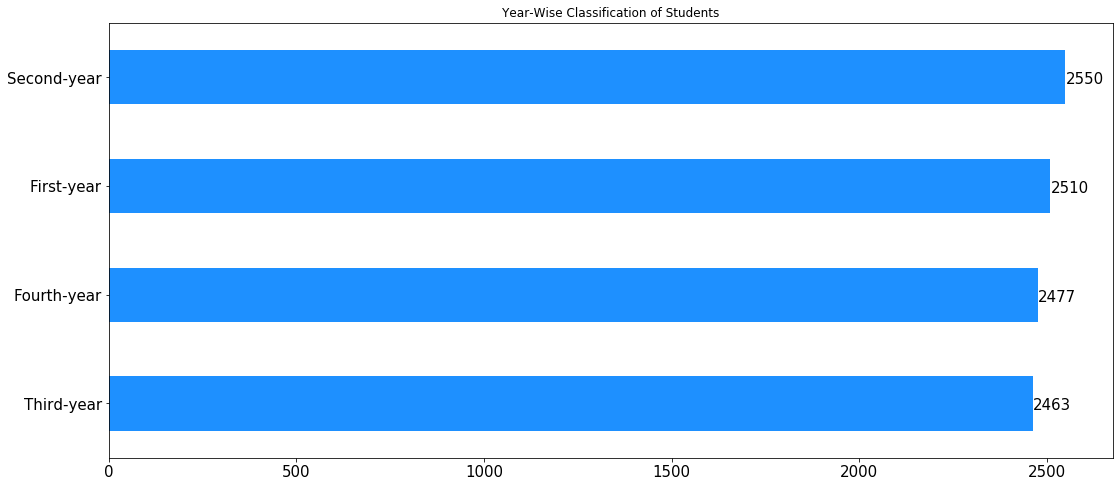

In [11]:
#2(f)
ax4 = data['Which-year are you studying in?'].value_counts().plot(kind='barh',figsize=(18,8),color='dodgerblue',fontsize=15,title="Year-Wise Classification of Students")
totals =[]
for i in ax4.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax4.patches:
    ax4.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax4.invert_yaxis()
pdf.savefig()

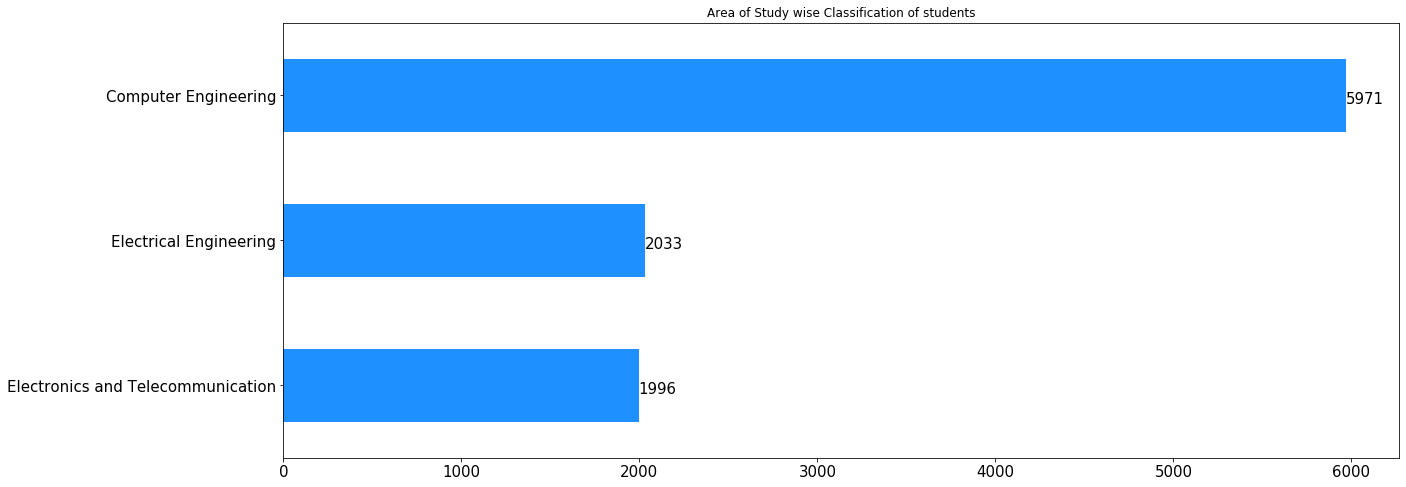

In [12]:
#2(g)
ax5 = data['Major/Area of Study'].value_counts().plot(kind='barh',color='dodgerblue',figsize=(20,8),fontsize=15,title="Area of Study wise Classification of students")
totals =[]
for i in ax5.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax5.patches:
    ax5.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax5.invert_yaxis()
pdf.savefig()

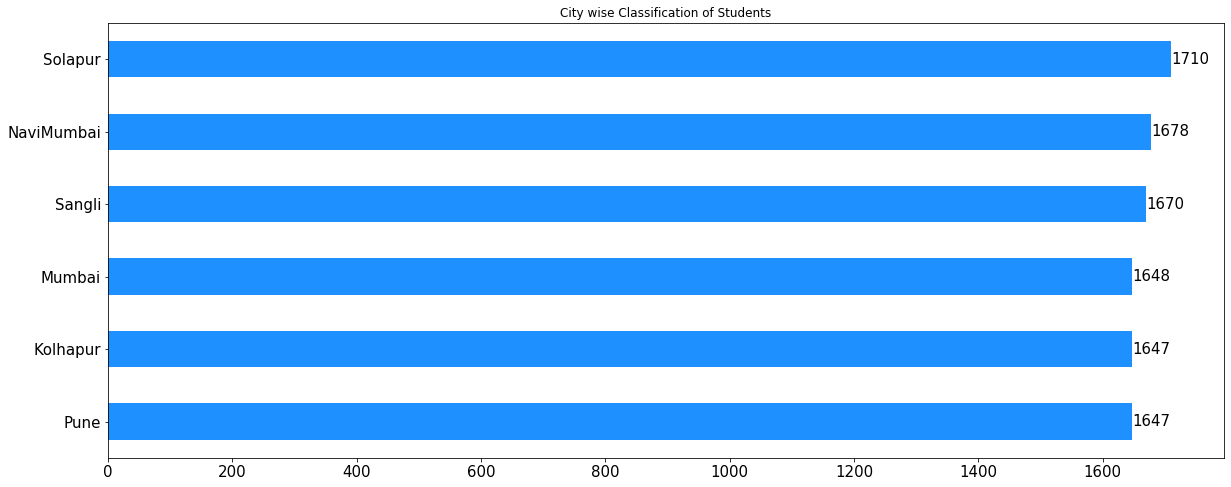

In [13]:
#2(h)
ax6 = data['City'].value_counts().plot(kind='barh',color='dodgerblue',figsize=(20,8),fontsize=15,title="City wise Classification of Students")
totals =[]
for i in ax6.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax6.patches:
    ax6.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax6.invert_yaxis()
pdf.savefig()

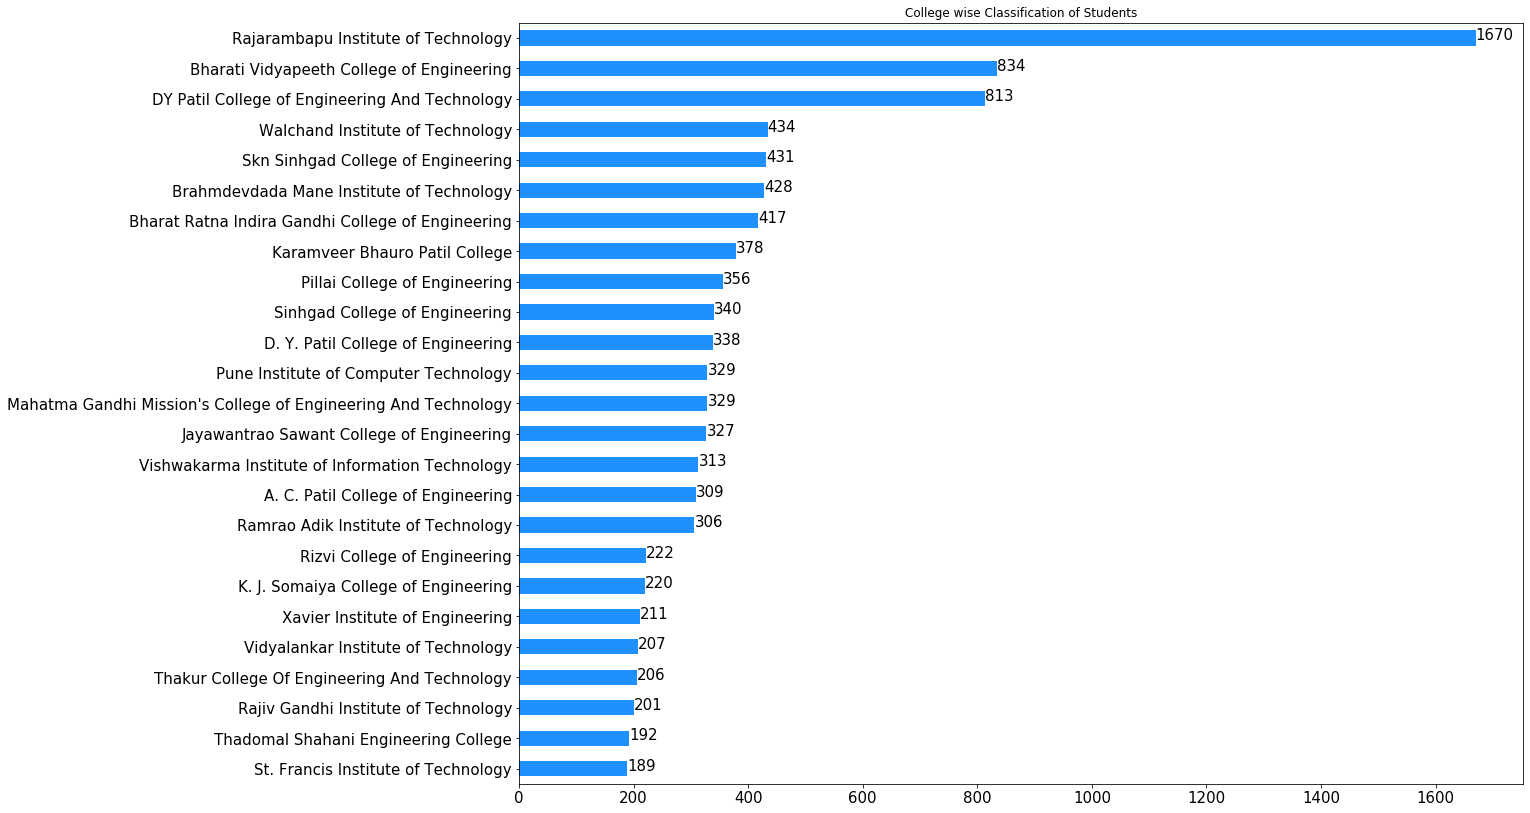

In [14]:
#2(i)
ax7 = data['College name'].value_counts().plot(kind='barh',figsize=(18,14),color='dodgerblue',fontsize=15,title="College wise Classification of Students")
totals =[]
for i in ax7.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax7.patches:
    ax7.text(i.get_width()+.1, i.get_y()+.31, str(round((i.get_width()), 2)), fontsize=15, color='black')
ax7.invert_yaxis()
pdf.savefig()

In [15]:
from sklearn.preprocessing import LabelEncoder
data1=data[['Areas of interest','Which-year are you studying in?','Major/Area of Study','label']]
le = LabelEncoder()
for col in data1:
    data1[col] = le.fit_transform(data1[col])
     
data1.head()

,Areas of interest,Which-year are you studying in?,Major/Area of Study,label
0,0,2,1,1
1,3,1,2,0
2,9,1,1,1
3,7,2,0,1
4,3,0,1,1


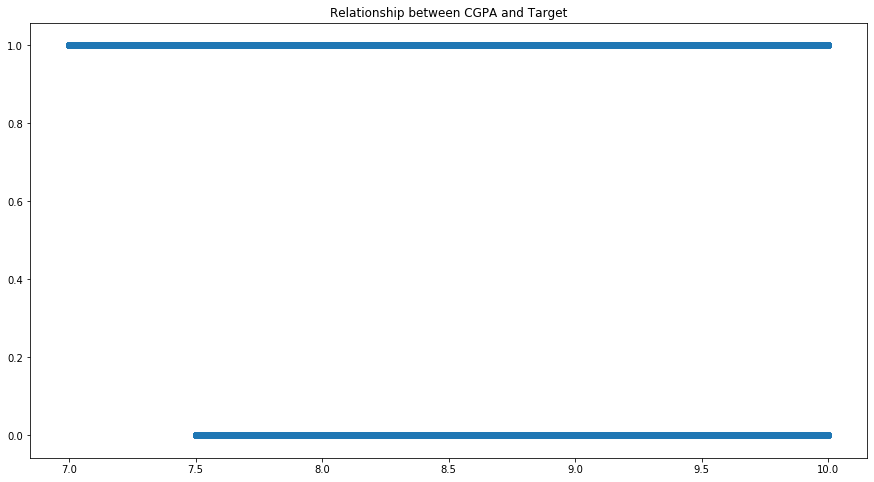

In [16]:
#2(j)
plt.figure(figsize=(15, 8))
plt.scatter(data['CGPA/ percentage'],data1['label'])
plt.title("Relationship between CGPA and Target")
pdf.savefig()

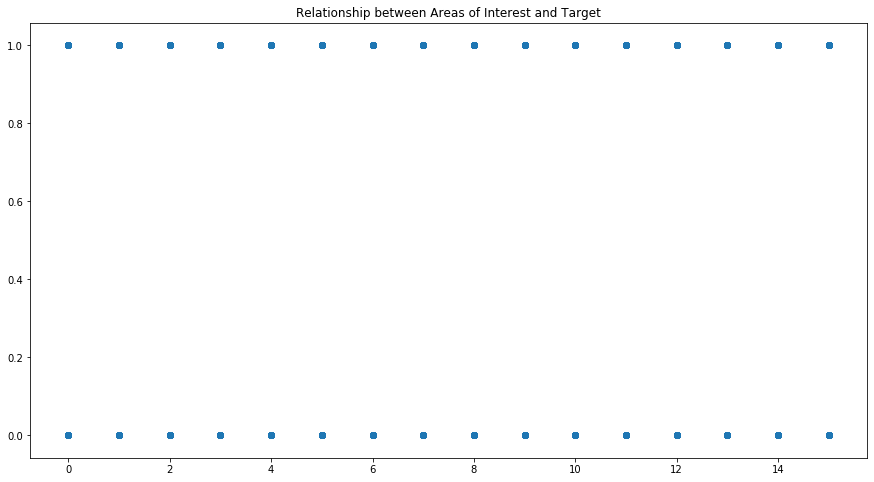

In [17]:
#2(k)
plt.figure(figsize=(15, 8))
plt.scatter(data1['Areas of interest'],data1['label'])
plt.title("Relationship between Areas of Interest and Target")
pdf.savefig()

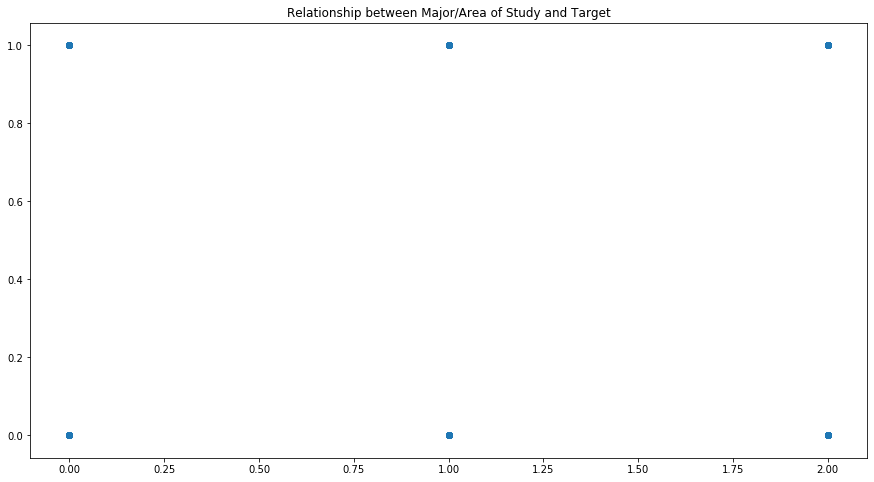

In [18]:
#2(l)
plt.figure(figsize=(15, 8))
plt.scatter(data1['Major/Area of Study'],data1['label'])
plt.title("Relationship between Major/Area of Study and Target")
pdf.savefig()

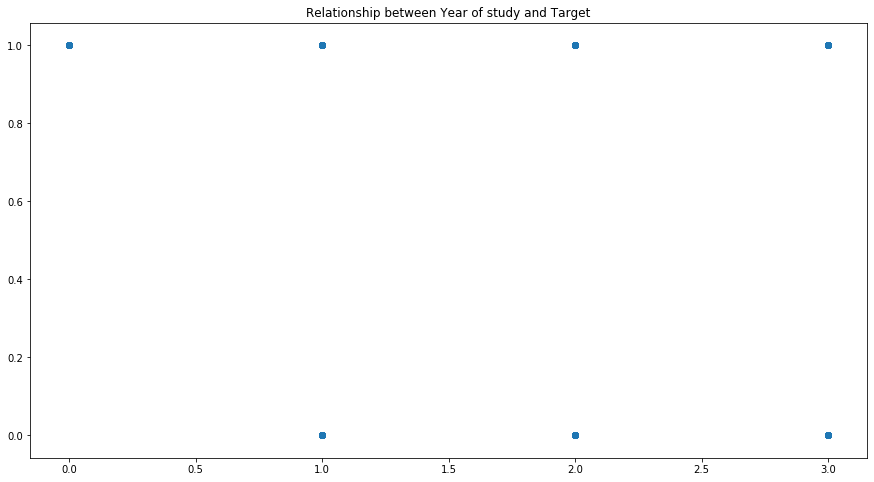

In [19]:
#2(m)
plt.figure(figsize=(15, 8))
plt.scatter(data1['Which-year are you studying in?'],data1['label'])
plt.title("Relationship between Year of study and Target")
pdf.savefig()

In [20]:
pdf.close()
print("PDF file created")

PDF file created
